                    Traitement d'image : Detection d'objets à l'aide de python

In [1]:
import numpy as np
from skimage.io import imread
from skimage.io import imshow
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage.feature import blob_dog, blob_log, blob_doh
from skimage.morphology import (erosion, dilation, closing, opening,
                                area_closing, area_opening)

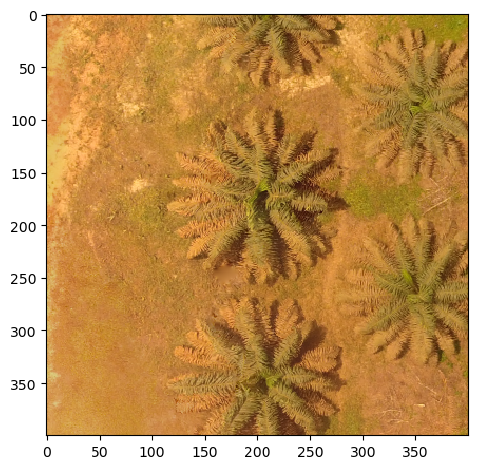

In [2]:
rbc = imread('palm_image.png')[:,:,:3]
imshow(rbc)

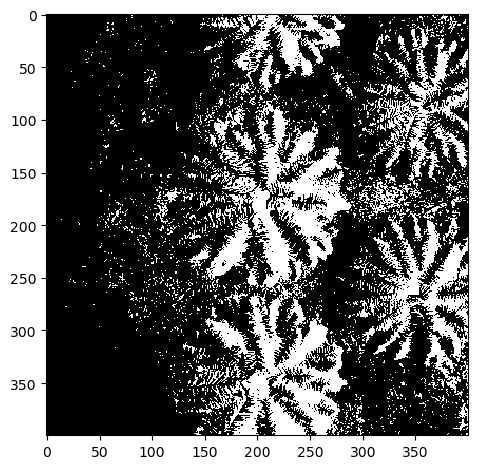

In [3]:
im = rgb2gray(rbc)
im2 = im < 0.48
imshow(im2)

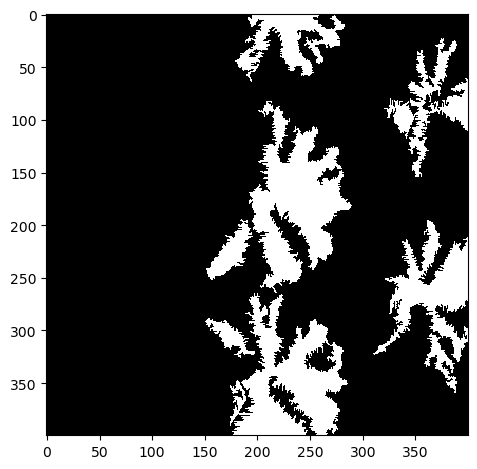

In [4]:
im_morph = area_closing(area_opening(im2, 400), 400)
imshow(im_morph);

/opt/conda/lib/python3.8/site-packages/skimage/io/_plugins/matplotlib_plugin.py:149: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


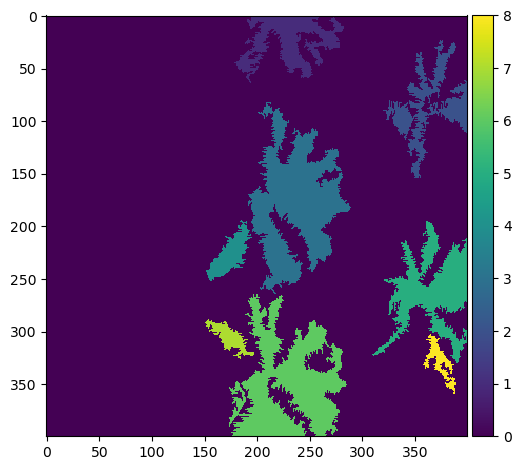

In [5]:
from skimage.measure import label, regionprops
label_im2 = label(im_morph)
imshow(label_im2)

Arbres comptés: 8


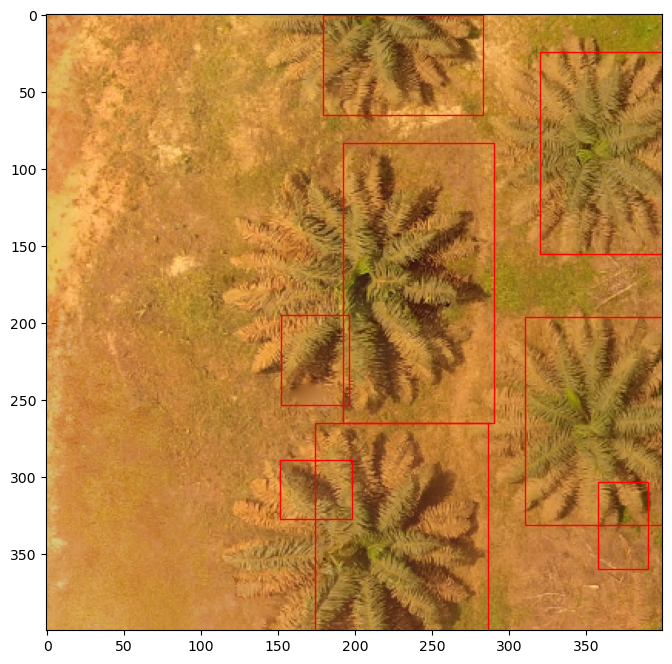

In [6]:
rbc_bw = label(im_morph)
rbc_props = regionprops(rbc_bw)
fig, ax = plt.subplots(figsize=(18, 8))
ax.imshow(rbc)
rbc_count = 0
for i, prop in enumerate(filter(lambda x: x.area > 207, rbc_props)):
    y1, x1, y2, x2 = (prop.bbox[0], prop.bbox[1],
                      prop.bbox[2], prop.bbox[3])
    width = x2 - x1
    height = y2 - y1
    r = plt.Rectangle((x1, y1), width = width, height=height,
                      color='r', fill=False)
    ax.add_patch(r)
    rbc_count += 1
print('Arbres comptés:', rbc_count)